# **Loan Default Prediction Case Study**

**Context**
It is very critical to be able to identify the loan defaults in the financial domain. Given a set of
features about a person, the goal is to predict if the person will default or not.


**Objective**
1. To create a model that predicts if a particular person will default or not using Logistic
Regression, Decision Tree and Random Forest algorithms
2. Compare the model on different performance measures


**Dataset**
The dataset used has the below features:
1. Default - Yes/No, categorical dependent variable suggesting the state of default.
2. Student - Yes/No, categorical independent variable depicting if the applicant is a student
or not.
3. Balance - The account balance of the applicant.
4. Income - The income of the applicant.

# **Data Loading and Pre-Processing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Practical6/Copy of Loan_Default.csv')
# returns the first 5 rows
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [4]:
rows, columns = df.shape

print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 10000 rows and 5 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [6]:
# Convert categorical features into numeric using LabelEncoder
le = LabelEncoder()
categorical_columns = ['student', 'default']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Unnamed: 0,default,student,balance,income
0,1,0,0,729.526495,44361.62507
1,2,0,1,817.180407,12106.13470
2,3,0,0,1073.549164,31767.13895
3,4,0,0,529.250605,35704.49394
4,5,0,0,785.655883,38463.49588


In [7]:
df.nunique()

,0
Unnamed: 0,10000
default,2
student,2
balance,9502
income,10000


# **Univariate Anlaysis**

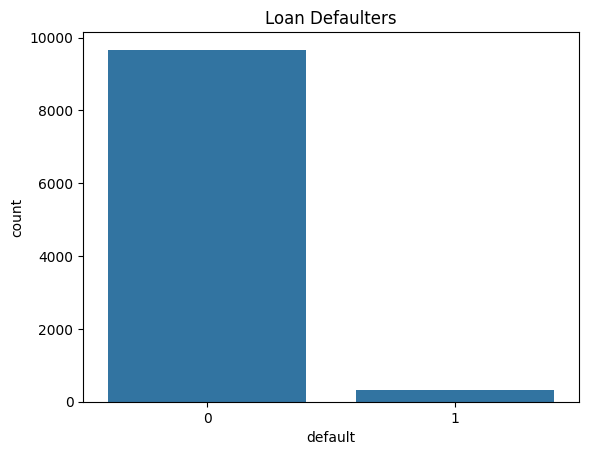

In [8]:
# Plot the distribution of deafualters (target variable)
sns.countplot(x='default', data=df)
plt.title('Loan Defaulters')
plt.show()


In [11]:
# Apply smote where 30 percent is yes and 70 percent is no in this class

from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

X = df.drop(columns=['default'])
y = df['default']

# Count current classes
counter = Counter(y)
n_majority = counter[0]
n_minority = counter[1]
n_total = n_majority + n_minority

# Calculate required number of minority samples to achieve 30%
target_ratio = 0.30
n_minority_target = int((target_ratio * n_majority) / (1 - target_ratio))

# Compute how many synthetic samples are needed
n_samples_to_add = n_minority_target - n_minority

# Define SMOTE with exact sampling strategy
sampling_strategy = n_minority_target / n_majority

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new distribution
print(pd.Series(y_resampled).value_counts(normalize=True))

default
0    0.7
1    0.3
Name: proportion, dtype: float64


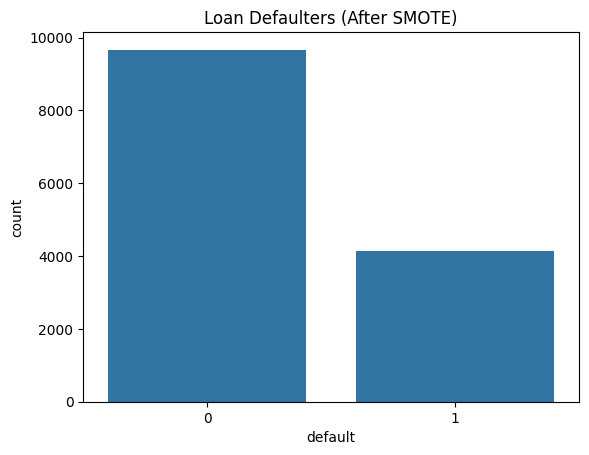

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine resampled features and target into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['default'] = y_resampled

# Plot the distribution of defaulters after SMOTE
sns.countplot(x='default', data=df_resampled)
plt.title('Loan Defaulters (After SMOTE)')
plt.show()


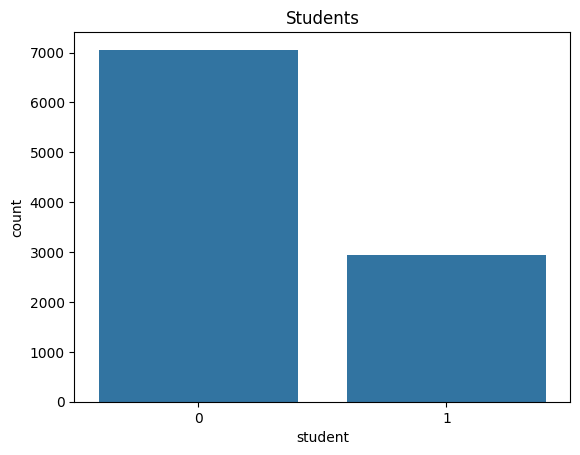

In [14]:
# Plot the distribution of students (target variable)
sns.countplot(x='student', data=df)
plt.title('Students')
plt.show()

# **Bivariate analysis**

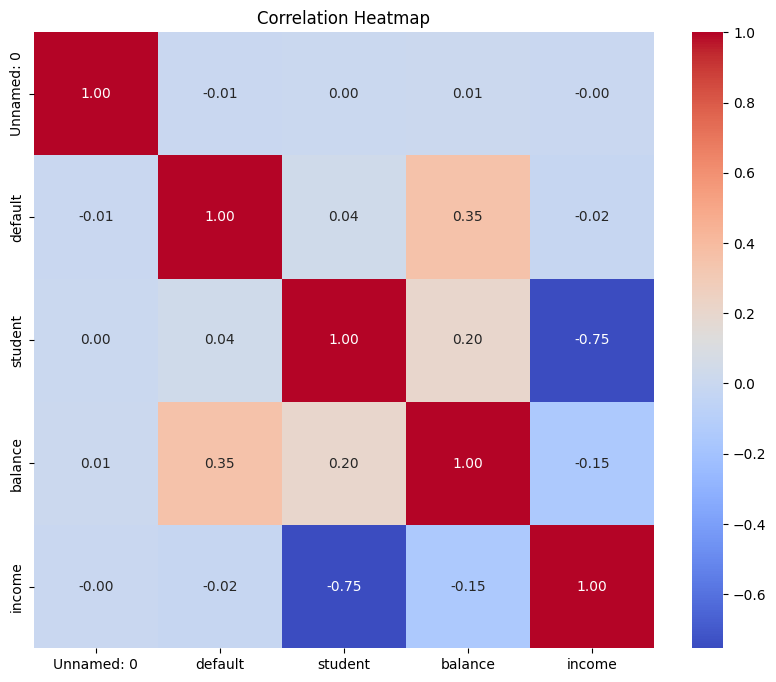

In [15]:
# Correlation matrix heatmap
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Data Splitting**

In [16]:
# X_resampled = df.drop('default', axis=1)
# y_resampled = df['default']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



In [17]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [19]:

y_pred = model.predict(X_test)


# **Model Analysis**

In [20]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 90.01%
Confusion Matrix:
 [[1813  145]
 [ 131  673]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1958
           1       0.82      0.84      0.83       804

    accuracy                           0.90      2762
   macro avg       0.88      0.88      0.88      2762
weighted avg       0.90      0.90      0.90      2762

